# Amostragem de Sinais

**Objetivos**
1. Amostrar sinais com diferentes frequências de amostragens

**Resultado Esperado**
1. Entender o efeito de aliasing/folding

**Entrega**
1. *Dessa vez preciso de um arquivo zip, algum mp3 curto deve ser entregue!*

In [3]:
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.ion()

## Introdução

Na engenharia ou na ciência da computação, um sinal pode ser definido como uma função que transmite informações sobre o estado ou comportamento de um sistema físico. Por exemplo, um sinal pode descrever a pressão sonora variável no tempo em algum lugar ou o movimento de uma partícula através de algum espaço. Na nossa disciplina, consideramos o caso de sinais de som ou áudio, que podem ser representados graficamente por um gráfico que mostra a pressão atmosférica relativa (em relação a uma pressão atmosférica de referência) ao longo do tempo. Começamos este laboratório definindo formalmente um sinal como uma função matemática. 

Um som é gerado por um objeto vibratório, como as cordas vocais de um cantor, a corda e a caixa de ressonância de um violino ou o diafragma de um tímpano. No processamento de sinal, esse som é normalmente representado por uma função ou sinal f: R → R, que codifica as mudanças de pressão atmosférica do som ao longo do tempo. O sinal é chamado de periódico se seus valores se repetem em intervalos regulares. Falando intuitivamente, o período do sinal é definido como o tempo necessário para completar um ciclo. A frequência, medida em Hertz (Hz), é o recíproco do período. O protótipo de tal sinal periódico é uma senóide, que é especificada por sua frequência, sua amplitude (o desvio de pico da senóide de sua média) e sua fase (determinando onde em seu ciclo a senóide está no tempo zero). Na célula de código a seguir, fornecemos uma função para gerar uma senóide. 

Intercalando a teoria com a prática, fornecemos uma função Python para gerar uma senóide com diferentes parâmetros (duração, amplitude, frequência, fase, taxa de amostragem).

In [4]:
def gera_senoide(dur=1, amp=1, freq=1, fase=0, taxa_amost=100):
    """
    Gera uma senóide

    Parâmetros
    ----------
    dur: duração em segundos
    amp: amplitude da onda
    freq: frequência da senóide
    fase: deslocamento no eixo-x
    taxa_amost: taxa de amostragem
    
    Retorna
    -------
    x, t: os valores da senóide e os tempos
    """
    # cada sengundo gera taxa_amost amostras
    num_samples = int(taxa_amost * dur)

    # observe como o tempo é o número de amostras dividido pela taxa
    # inverso do acima.
    t = np.arange(num_samples) / taxa_amost
    x = amp * np.sin(2 * np.pi * (freq * t - fase))
    return x, t

Abaixo temos uma senóide simples.

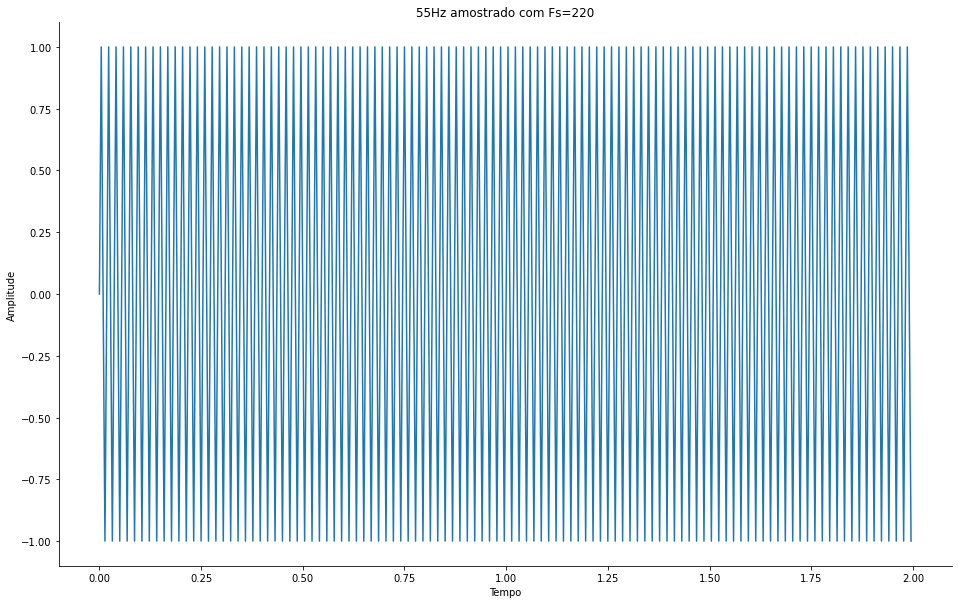

In [5]:
x, t = gera_senoide(dur=2, amp=1, freq=55, fase=0, taxa_amost=220)
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(t, x)
ax.set(xlabel='Tempo', ylabel='Amplitude', title='55Hz amostrado com Fs=220')
sns.despine(fig)

E agora um lindo **lá** de 440Hz, puro!

In [6]:
dur = 10
Fs = 900
x, t = gera_senoide(dur=dur, amp=1, freq=440, taxa_amost=Fs)

ipd.display(ipd.Audio(x, rate=Fs))

**Exercício 1: Simulando um Sinal Real** 

Crie uma função que toca *dó*, *ré*, *mi*, *fá*, *só*, *lá*,
*si*, *dó*. Cada nota vai ser tocada por um segundo!

Comece pelo *dó* unissono, de 132 Hz. Termine no *dó* de 264 Hz. Para lhe ajudar, ao invés de gerar apenas dó, re, mi, gere as doze notas das escala cromática.

Cada semitom deve ser tocado por um segundo. Coloque uma pausa de um segundo entre semitons. Assim, se você caminhar nos 12 semitons da escala cromática, sua música deve ser de 24 segundos.

*Para simular um sinal real, garanta que sua música tem uma taxa de amostragem alta suficiente, pelo menos o dobro do último semitom. Recomendo algo como 550 ou 1000*

In [7]:
def nota(semitom):
    """
    Calcula a frequência de uma nota a partir do c4 (132 Hz), midi 48
    """
    p = semitom + 48
    expo = p - 69
    expo = expo / 12
    
    note = 440 * 2 ** (expo)
#     print(p, expo, note)
    return note


def doremi(Fs):
    dur = 1
    result = []
    for i in range(12):
        freq = nota(i)
        x1, t1 = gera_senoide(dur=dur, amp=.5, freq=freq, taxa_amost=Fs)
        x2, t2 = gera_senoide(dur=dur, amp=.5, freq=0, taxa_amost=Fs)
        x3 = np.concatenate((x1,x2))
        result = np.concatenate((result, x3))
    return result

**Exercício 2: Toque sua música**

Obs.: para ter 24 segundos, tocamos 12 notas. De dó até dó (incluindo ambos) temos 13 notas. Faremos aqui de dó (c3) até si (b3)

In [8]:
Fs = 1000
song = doremi(Fs)
ipd.display(ipd.Audio(song, rate=Fs))

## Amostragem

No processamento de sinal digital, freqüentemente se reduz um sinal de tempo contínuo f: R → R em um sinal de tempo discreto x: Z → R por um procedimento conhecido como amostragem equidistante. Fixando um número real positivo $T > 0$, o sinal discreto $x$ é obtido por: 

$x(n) = f(n.T)$

Aqui, $n$ é um índice discreto.

In [15]:
n = 100
x[100]

-0.6427876096865534

Resumindo, esse procedimento também é chamado de amostragem uniforme. O número $T$ é referido como o período de amostragem, seu inverso $Fs: = 1 / T$ é a taxa de amostragem. A taxa de amostragem especifica o número de amostras por segundo e é medida em Hertz (Hz).

**Exercício 2 (Amostrando)**

Crie uma função que amostra a música acima com uma nova taxa de amostragem. Sei que parece estranho, mas preciso simular um aúdio real com a música acima. Então qual é a brincadeira, assuma que seu *dó, re, mi* é o sinal $f$. Crie uma nova função que amostra $f$ com uma outra taxa. A sua amostragem tem que ser uniforme seguindo: $x(n) = f(n.T)$. 

In [16]:
def amostra(f, tempo_sinal, taxa_amost):
    """
    Amostra um sinal de forma uniforme

    Parâmetros
    ----------
    f: o sinal em si
    tempo_sinal: o tempo total do sinal. No caso acima, seria 24 segundos.
    taxa_amost: a taxa de amostragem
    
    Retorna
    -------
    x: o sinal amostrado
    t: vetor do mesmo tamanho de x, mapeia cada posição para um novo tempo.
       este tempo seria o n.T, para cada n, descrito acima.
    """
    
    # Acha qual o tamanho (qtd posições) do vetor resultado da amostragen
    amostragem_nova = taxa_amost
    len_res = tempo_sinal * amostragem_nova
    
    # Fator que vamos usar para amostrar, com base na razão dos tamanhos
    T = len(f)/len_res
    print(T)
    
    # Amostra com res[n] = f[n*T]
    res = np.zeros(len_res)
    idxs = []
    for i in range(len(res)):
        idx = int(i*T)
        if (idx-i*T != 0):
            # Uma pequena interpolação, para mitigar alguns artefatos
            # quando o índice não é inteiro
            res1 = idx
            res2 = idx + 1
            res[i] = (f[res1] + f[res2]) / 2
        else:
            res[i] = f[idx]
        idxs.append(idx)
    
    return res, idxs

In [17]:
Fs2 = 250
amo, idxs = amostra(song, 24, Fs2)
ipd.display(ipd.Audio(amo, rate=Fs2))

4.0


In [12]:
Fs2 = 400
amo, idxs = amostra(song, 24, Fs2)
ipd.display(ipd.Audio(amo, rate=Fs2))

2.5


In [13]:
Fs2 = 600
amo, idxs = amostra(song, 24, Fs2)
ipd.display(ipd.Audio(amo, rate=Fs2))

1.6666666666666667


**Exercício 3: Qual deve ser essa nova taxa de amostragem para reconstruir o sinal perfeitamente?**

Segundo o teorema de Nyquist, deve ser pelo menos o dobro da maior frequência do som a ser amostrado. Assim, em torno de 600Hz como taxa de amostragem permite reconhecer o sinal perfeitamente. Apesar de esse tipo amostragem criar alguns artefatos também, mas é diferente de não reproduzir o som corretamente, como é o caso de uma frequência muito baixa, como o 250Hz.

## Reconstruindo o Sinal

O teorema da amostragem, frequentemente associado aos nomes Harry Nyquist e Claude Shannon, afirma que um sinal de tempo contínuo limitado em sua frequência máxima pode ser reconstruído perfeitamente sob certas condições. Em sala de aula não vimos os detalhes de como o sinal é reconstruído, porém abaixo temos a equação:

![](https://dcc.ufmg.br/~flaviovdf/mir/lab03/imgs/f.png)

Embora não temos a função o [Audacity](https://www.audacityteam.org/download/)
faz isso por nós. Leia a documentação [aqui](https://manual.audacityteam.org/man/importing_audio.html).

**Exercício 4: Carregue seu sinal amostrado no audacity com uma taxa de amostrage suficiente. O audacity tocou a mesma música?**. 

**Vídeo**

Sim, o Audacity tocou a mesma música. Podemos ver no vídeo gravado no Youtube: [link](https://youtu.be/6o3wmy-gAGE)

**Exercício 5: Carregue seu sinal amostrado no audacity com uma taxa de amostrage menor do que a suficiente. Descreva os problemas na mesma!**. 

Com taxas próximas de 500Hz ou menos, as notas ficam ou irreconhecíveis ou nem aparecem. Quando reduzimos as frequências, as notas mais agudas são as primeiras a desaparecer ou desfigurar. Nos testes no notebook, com uma taxa muito baixa, chega um ponto que a escala, que soava ascendente, passa a soar descentente, possivelmente por conta do aliasing.

In [14]:
Fs2 = 250
amo, idxs = amostra(song, 24, Fs2)
ipd.display(ipd.Audio(amo, rate=Fs2))

4.0
